In [31]:
# Import relevant packages
import pandas as pd
import numpy as np
import requests
import re
import datetime as dt
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import json

In [32]:
# GET HTTP Requests for questions tagged as R and Pandas across the Stack Overflow subcommunity sorted by popularity
stackR = requests.get("https://api.stackexchange.com/2.2/tags/r/info?order=desc&sort=popular&site=stackoverflow")
stackP = requests.get("https://api.stackexchange.com/2.2/tags/pandas/info?order=desc&sort=popular&site=stackoverflow")

In [33]:
# GET HTTP Requests for questions tagged as R and Pandas across the Cross Validated subcommunity sorted by popularity
crossR = requests.get("https://api.stackexchange.com/2.2/tags/r/info?order=desc&sort=popular&site=stats")
crossP = requests.get("https://api.stackexchange.com/2.2/tags/pandas/info?order=desc&sort=popular&site=stats")

In [34]:
# GET HTTP Requests for questions tagged as R and Pandas across the Data Science subcommunity sorted by popularity
dataR = requests.get("https://api.stackexchange.com/2.2/tags/r/info?order=desc&sort=popular&site=datascience")
dataP = requests.get("https://api.stackexchange.com/2.2/tags/pandas/info?order=desc&sort=popular&site=datascience")

In [35]:
# Converting the results of the HTTP requests into JSON objects
stackRjson = stackR.json()
stackPjson = stackP.json()
crossRjson = crossR.json()
crossPjson = crossP.json()
dataRjson = dataR.json()
dataPjson = dataP.json()
stackRjson

{'items': [{'has_synonyms': True,
   'is_moderator_only': False,
   'is_required': False,
   'count': 320568,
   'name': 'r'}],
 'has_more': False,
 'quota_max': 300,
 'quota_remaining': 293}

In [36]:
# Normalize the JSON objects into individual dataframes
stackRdf = json_normalize(stackRjson["items"])
stackRcount = stackRdf["count"][0]
stackPdf = json_normalize(stackPjson["items"])
stackPcount = stackPdf["count"][0]
crossRdf = json_normalize(crossRjson["items"])
crossRcount = crossRdf["count"][0]
crossPdf = json_normalize(crossPjson["items"])
crossPcount = crossPdf["count"][0]
dataRdf = json_normalize(dataRjson["items"])
dataRcount = dataRdf["count"][0]
dataPdf = json_normalize(dataPjson["items"])
dataPcount = dataPdf["count"][0]

In [37]:
# Creating a summary dataframe that combines the number of tags for both data science tools across each of the three stack exchange subcommunities  
summarydf = pd.DataFrame({'Subcommunity': ["Stack Overflow", "Cross Validated", "Data Science", "All"], 'Number of Questions Tagged as R': [stackRcount, crossRcount, dataRcount, stackRcount+crossRcount+dataRcount], 'Number of Questions Tagged as Pandas': [stackPcount, crossPcount, dataPcount, stackPcount+crossPcount+dataPcount]})
summarydf

,Subcommunity,Number of Questions Tagged as R,Number of Questions Tagged as Pandas
0,Stack Overflow,320568,130807
1,Cross Validated,21183,102
2,Data Science,1100,722
3,All,342851,131631


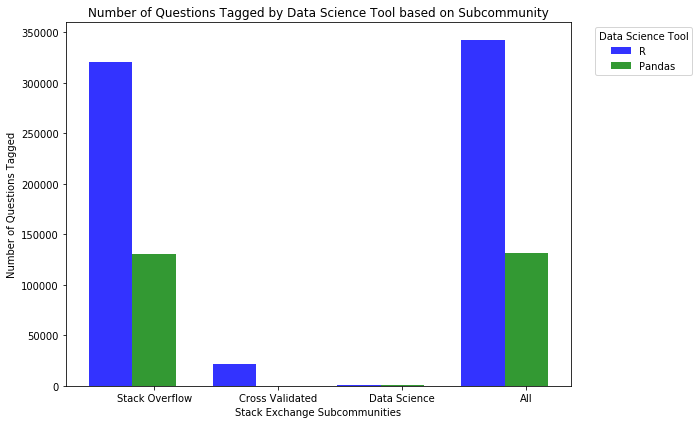

In [38]:
n_groups = 4
vals1 = summarydf["Number of Questions Tagged as R"]
vals2 = summarydf["Number of Questions Tagged as Pandas"]

# Create Barplot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rect1 = plt.bar(index, vals1, bar_width, alpha=opacity, color='b', label='R')

rect2 = plt.bar(index + bar_width, vals2, bar_width, alpha=opacity, color='g', label='Pandas')

plt.xlabel('Stack Exchange Subcommunities')
plt.ylabel('Number of Questions Tagged')
plt.title('Number of Questions Tagged by Data Science Tool based on Subcommunity')
plt.xticks(index + bar_width, ('Stack Overflow', 'Cross Validated', 'Data Science', 'All'))
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1), title="Data Science Tool")
plt.rcParams["figure.figsize"] = [10, 6]
plt.tight_layout()
plt.show()

<b>Analysis</b>

Based on the graph above and the dataframe's data, it is cleas that R is the more popular data science tool over Pandas across all subcommunities (Stack Overflow, Cross Validated, and Data Science). The stack overlow community had the greatest number of tags regarding the data science tool however, this was expected since this community is the gneral community for all questions on Stack Exchange. Additionally, R's popularity in the Cross Validated community based on its number of tags also presents the fact that it is a tool generally used for statistics.

<b>Conclusion</b>

In conclusion, it can be observed that R is the more popular data science tool across all communitiies and as such, it is the most widely used tool in the data science community. Hence, if a person were to enter this industry professionally, they would be require to posses skills and knowledge in R as a necessity over Pandas.

<b>Limitations</b>

Based on research performed by third parties, Python is consistently more popular than R as a data science tool however our conclusions specifically focused on a single package of Python and its comparison to R's overall popularity. As such, a limitation exists in the fact that we are comparing Pandas, a specific package for the Python language, against R which is an entire language in-and-of itself. Hence, R would have been expected to have more tags over Pandas. Therefore, our conclusions are not entirely comparable to the outside research performed however it is interesting to note that as a whole, the most popular data manipulation tool used in Python is less popular than R among data science communities despite the overwhelming dominance of Python in such communities. Based on our data, it was clear to see the divide between R and Pandas tags was the least in the data science community which could be due to this reason as well.

Furthermore, a better method of comparing the two tools would consist of comparing the tags of both languages against each other instead of analysing the mentions of a package against a language. Additionally, another limitation of this study is that we purely looked into the number of tags used for questions to determine the popularity of the data science tool in each community and did not pay attention to the number of answers provided to the questions. Therefore, even if the tool is mentioned more and has a greater level of popularity, this does not necessarily mean that the community has greater knowledge of the tool. As such, focusing on the number of answers instead of the number of tags for each language would be a better method of evaluating the popularity and knowledge of a data science tool within multiple communities. 

<b>Data Source Citation and Explanation</b>

For this project, I accessed all my data through an HTTP GET request that extracted information regarding tagged questions directly from Stack Exchange through their API. The data collected included information regarding the specific tags I was examining and the subcommunity I was attempting to collect information regarding. The data also included information regarding whether the subcommunity was moderated however, the most important information collected from the API consisted of the count of questions within a subcommunity that used the tag being examined.

<b>Citations</b>

- Data-Driven Science. “Python vs R for Data Science: And the Winner Is..” Medium, Medium, 31 Jan. 2018, https://medium.com/@data_driven/python-vs-r-for-data-science-and-the-winner-is-3ebb1a968197.Theuwissen, 
- Martijn. “R Vs Python for Data Science: The Winner Is ...” KDnuggets, https://www.kdnuggets.com/2015/05/r-vs-python-data-science.html.
- “Stack Exchange API.” Stack Exchange API, https://api.stackexchange.com/.